## Earth orbit around a stationary Sun

In [1]:
# For interactive plots
%matplotlib notebook

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')
from celluloid import Camera

In [2]:
# Define constants
G = 6.67e-11 # m^3 kg^-1 s^-2
M = 1.99e30 # kg
m = 5.97e24 # kg

In [3]:
# Define function to calculate gravitational force
def calculate_force(pos):
    
    # Extract x- and y-coordinates
    x = pos[0]
    y = pos[1]
    
    # Calculate radial distance and angle 
    r = (x**2 + y**2)**0.5
    theta = np.arctan2(y, x)
    
    # With Sun at origin, calculate x- and y-components of central gravitational force
    mag_F = G*M*m / (r**2)
    
    # Resolve into components
    F_x = -1*mag_F*np.cos(theta)
    F_y = -1*mag_F*np.sin(theta)
    
    # Return force vector
    F = np.array([F_x, F_y])
    
    return F

In [4]:
# Initialise starting position and velocity
particle_initial_pos = np.array([1.5e11,0]) # 1 AU
particle_initial_vel = np.array([0, np.pi*2*1.50e11 / (365.25*24*60**2)]) # Tangential velocity assuming circular orbit

In [5]:
# Define function to update position after one time step given the current velocity
def calculate_new_position(pos, vel):
    
    # Calculate position one hour later
    new_pos = pos + vel * 60**2
    
    return new_pos

In [6]:
# Define function to update velocity after one time step given the current gravitational force acting
def calculate_new_velocity(vel, force):
    
    # Calculate velocity hour day later, assuming constant force over time interval
    new_vel = force*(60*60/m) + vel
    
    return new_vel

In [7]:
# Trace planet path over the course of a year (and a bit—need to run for longer than one year to get a full 
# orbit due to our approximations)
def trace_planet_path(pos, vel):
    
    # Set up variables to store current position, velocity and force acting
    current_pos = pos
    current_vel = vel
    current_force = calculate_force(pos)
    
    # Set up array to hold positions
    pos_history = np.empty((380*24,2))
    pos_history[0] = current_pos
    
    # Set up array to hold velocities
    vel_history = np.empty((380*24,2))
    vel_history[0] = current_vel
    
    # Stepping forward a day at a time, calculate the new position, velocity and force acting on the planet
    for i in range(1,370*24):
        current_pos = calculate_new_position(current_pos, current_vel)
        current_vel = calculate_new_velocity(current_vel, current_force)
        current_force = calculate_force(current_pos)
        
        # Record position and velocity 
        pos_history[i] = current_pos
        vel_history[i] = current_vel
        
    # Return an array containing the histories of the planet position and velocity
    return np.array([pos_history, vel_history])

In [8]:
# Run the trace function given initial position and velocity
orbit = trace_planet_path(particle_initial_pos, particle_initial_vel)

<IPython.core.display.Javascript object>


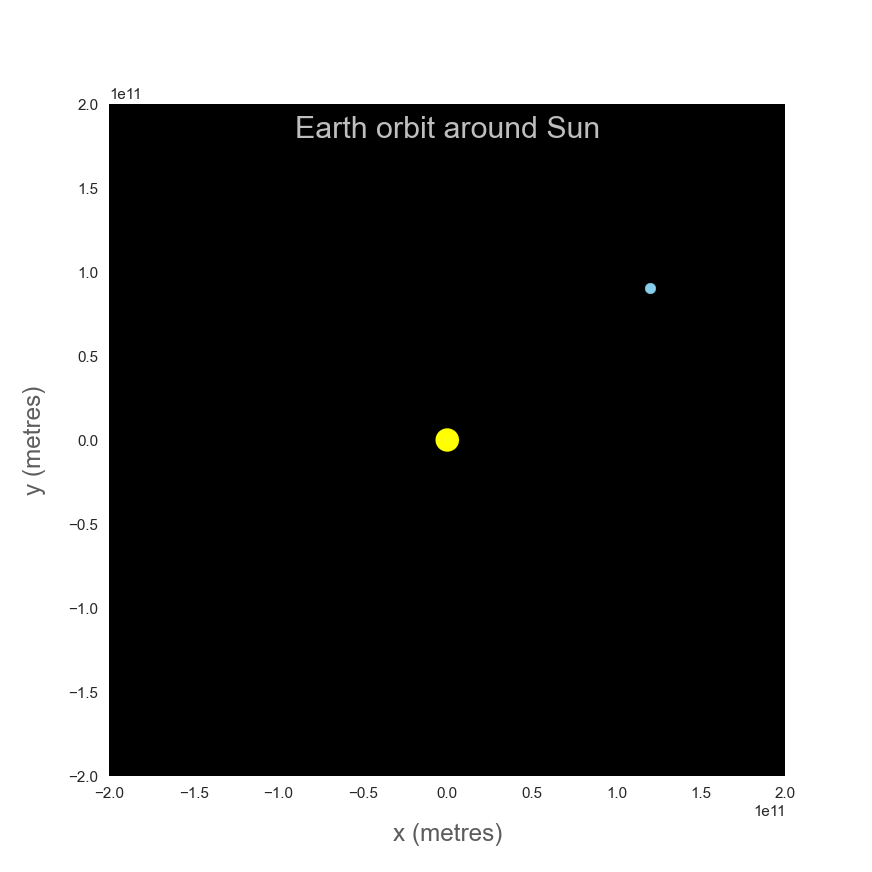

In [9]:
# Plot the results

# Set up plotting area
fig, ax = plt.subplots(figsize=(8,8))

# Set up camera (to display movement of planet as an animation)
camera = Camera(fig)

# Add x label to plot
ax.set_xlabel("x (metres)", alpha = .75, labelpad=15, fontsize=16)

# Add y label to plot
ax.set_ylabel("y (metres)", alpha = .75, labelpad=15, fontsize=16)

# Remove gridlines 
ax.grid(False)

# Space is black, obviously
ax.set_facecolor('black')

# Set x- and y-limits.  Plot will span 16 square astronomical units centred on the Sun
plt.xlim(-2e11,2e11)
plt.ylim(-2e11,2e11)

# Plot out each frame of the animation.  
for i in range(0,len(orbit[0][:,]),50):
    
    # Add Earth position after i hours
    plt.scatter(orbit[0][i,0], orbit[0][i,1], color='skyblue')
    
    # Add Sun (size scaled up by a factor of 10 for visibility)
    circle = plt.Circle((0, 0), 696340e4, fc='yellow')
    plt.gca().add_patch(circle)
    
    # Add title
    ax.text(x = 0, y = 1.8e11, s = "Earth orbit around Sun", fontsize = 20, alpha = .75, ha="center", color="white")
    
    # Record frame of the animation
    camera.snap()

In [10]:
# Create animation and save as a .gif file
anim = camera.animate(interval=5)
anim.save("earth-sun-orbit.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
